In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
dataset=pd.read_csv('dataset/24-hours Delhi Power Consumption dataset.csv')
dataset.head()

,Unnamed: 0,timestamp,day_of_week,hour_of_day,is_weekend,temperature,is_holiday,solar_generation,load,compensation_method
0,0,2023-01-01 00:00:00,6,0,1,17.483571,0,7.819507,18493,Normal Operation
1,1,2023-01-01 01:00:00,6,1,1,14.308678,0,0.886376,17090,Normal Operation
2,2,2023-01-01 02:00:00,6,2,1,18.238443,0,0.798470,16052,Normal Operation
3,3,2023-01-01 03:00:00,6,3,1,22.615149,0,3.067700,15356,Normal Operation
4,4,2023-01-01 04:00:00,6,4,1,13.829233,0,0.359479,14936,Normal Operation


In [27]:
dataset.isna().sum()

Unnamed: 0             0
timestamp              0
day_of_week            0
hour_of_day            0
is_weekend             0
temperature            0
is_holiday             0
solar_generation       0
load                   0
compensation_method    0
dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [29]:
X = dataset[['temperature', 'solar_generation', 'hour_of_day', 'load', 'is_holiday']]
y=dataset['compensation_method']
X_reg = dataset[['temperature', 'solar_generation', 'hour_of_day', 'is_holiday']]
y_reg = dataset['load']
le = LabelEncoder()
y = le.fit_transform(y)

In [60]:
unique_values = np.unique(y)
print(len(unique_values))

5


In [31]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

In [39]:
# print(X_test.isnull().sum())
print(X_train.isnull().sum())
print(pd.Series(y_train).isnull().sum())
print(len(X_test))
print(X_test.dtypes)

temperature         0
solar_generation    0
hour_of_day         0
load                0
is_holiday          0
dtype: int64
0
2622
temperature         float64
solar_generation    float64
hour_of_day           int64
load                  int64
is_holiday            int64
dtype: object


In [33]:
import tensorflow.keras as keras

model=keras.models.Sequential()
model.add(keras.layers.Dense(64, activation='relu', input_shape=(X_reg.shape[1],)))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

history = model.fit(X_reg_train, y_reg_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
153/153 [==============================] - 1s 5ms/step - loss: 315681792.0000 - mae: 17444.4062 - val_loss: 261894400.0000 - val_mae: 15819.2344
Epoch 2/50
153/153 [==============================] - 1s 4ms/step - loss: 170016064.0000 - mae: 11898.3379 - val_loss: 106862584.0000 - val_mae: 8994.7295
Epoch 3/50
153/153 [==============================] - 1s 3ms/step - loss: 109969576.0000 - mae: 9157.6348 - val_loss: 81291040.0000 - val_mae: 7802.9258
Epoch 4/50
153/153 [==============================] - 1s 4ms/step - loss: 85332608.0000 - mae: 7921.8203 - val_loss: 55122880.0000 - val_mae: 6285.9009
Epoch 5/50
153/153 [==============================] - 1s 4ms/step - loss: 63457248.0000 - mae: 6593.9897 - val_loss: 36564664.0000 - val_mae: 4811.1050
Epoch 6/50
153/153 [==============================] - 1s 3ms/step - loss: 53064444.0000 - mae: 5893.7905 - val_loss: 31692648.0000 - val_mae: 4242.4136
Epoch 7/50
153/153 [==============================] - 1s 4ms/step - loss: 504455

In [53]:
model_cls=keras.models.Sequential()
model_cls.add(keras.layers.Dense(64, activation='relu', input_shape=(X.shape[1],)))
model_cls.add(keras.layers.Dropout(0.5))
model_cls.add(keras.layers.Dense(32, activation='relu'))
model_cls.add(keras.layers.Dropout(0.5))
model_cls.add(keras.layers.Dense(5, activation='softmax'))

model_cls.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_cls = model_cls.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
153/153 [==============================] - 1s 5ms/step - loss: 2119.1191 - accuracy: 0.2850 - val_loss: 22.1329 - val_accuracy: 0.5209
Epoch 2/50
153/153 [==============================] - 1s 4ms/step - loss: 250.3231 - accuracy: 0.3745 - val_loss: 1.5271 - val_accuracy: 0.5209
Epoch 3/50
153/153 [==============================] - 1s 4ms/step - loss: 61.0932 - accuracy: 0.4538 - val_loss: 1.4628 - val_accuracy: 0.5209
Epoch 4/50
153/153 [==============================] - 1s 4ms/step - loss: 30.5310 - accuracy: 0.4834 - val_loss: 1.4056 - val_accuracy: 0.5209
Epoch 5/50
153/153 [==============================] - 1s 4ms/step - loss: 16.1300 - accuracy: 0.4875 - val_loss: 1.3612 - val_accuracy: 0.5209
Epoch 6/50
153/153 [==============================] - 1s 4ms/step - loss: 8.6636 - accuracy: 0.4963 - val_loss: 1.3292 - val_accuracy: 0.5209
Epoch 7/50
153/153 [==============================] - 1s 4ms/step - loss: 6.3771 - accuracy: 0.4992 - val_loss: 1.3056 - val_accuracy: 0.52

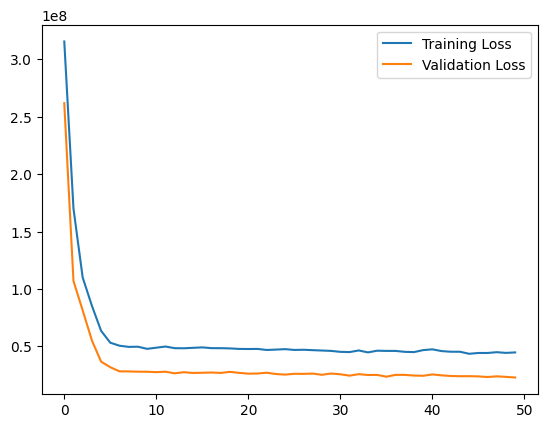

In [54]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [56]:
from sklearn.metrics import accuracy_score, classification_report, root_mean_squared_error, confusion_matrix

y_pred = model_cls.predict(X_test)
# print(np.isnan(y_pred).sum())
class_accuracy = accuracy_score(y_test, y_pred)
print(f"Classification Model Accuracy: {class_accuracy:.2f}")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Make predictions on the test set for regression (peak supply)
y_reg_pred = model.predict(X_reg_test)
reg_mse = root_mean_squared_error(y_reg_test, y_reg_pred)
print(f"Regression Model Mean Squared Error: {reg_mse:.2f}")
print(confusion_matrix(y_test, y_pred))

82/82 [==============================] - 0s 2ms/step


ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [48]:
import tensorflow as tf
exple = dataset.iloc[0][['temperature', 'solar_generation', 'hour_of_day', 'is_holiday','load']].values.reshape(1, -1)
exple_tensor = tf.convert_to_tensor(exple, dtype=tf.float64)
exple_pred = model_cls.predict(exple_tensor)
print(exple_pred)
# exple_pred = model.predict(exple)
# print(exple_pred)

1/1 [==============================] - 0s 68ms/step
[[nan]]


In [49]:
model_cls.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 64)                384       
                                                                 
 dropout_14 (Dropout)        (None, 64)                0         
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dropout_15 (Dropout)        (None, 32)                0         
                                                                 
 dense_23 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________
